In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
df = pd.read_csv('k menas data.csv')
df.head()

,Customer ID,Annual Spending,Purchase Frequency,Avg Order Value
0,1,1200,12,100
1,2,3000,30,100
2,3,450,5,90
3,4,800,8,100
4,5,2200,25,88


In [75]:
# Step 1: Inspect the dataset
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())
print("\nNull values:\n", df.isnull().sum())


Dataset shape: (5, 4)

Data types:
 Customer ID           int64
Annual Spending       int64
Purchase Frequency    int64
Avg Order Value       int64
dtype: object

Summary statistics:
        Customer ID  Annual Spending  Purchase Frequency  Avg Order Value
count     5.000000         5.000000            5.000000           5.0000
mean      3.000000      1530.000000           16.000000          95.6000
std       1.581139      1050.951949           10.931606           6.0663
min       1.000000       450.000000            5.000000          88.0000
25%       2.000000       800.000000            8.000000          90.0000
50%       3.000000      1200.000000           12.000000         100.0000
75%       4.000000      2200.000000           25.000000         100.0000
max       5.000000      3000.000000           30.000000         100.0000

Null values:
 Customer ID           0
Annual Spending       0
Purchase Frequency    0
Avg Order Value       0
dtype: int64


In [77]:
# Drop irrelevant columns (CustomerID is an identifier, not useful for clustering)
df1 = df.drop("Customer ID", axis=1)

In [79]:
# Step 3: Feature Scaling (important for clustering)
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

# Convert back to DataFrame for easier viewing
df2 = pd.DataFrame(df2, columns=df1.columns)

# Step 4: Show the scaled data
print("\nScaled data:\n", df2.head())


Scaled data:
    Annual Spending  Purchase Frequency  Avg Order Value
0        -0.351064           -0.409101         0.810931
1         1.563830            1.431855         0.810931
2        -1.148936           -1.125029        -1.032094
3        -0.776596           -0.818203         0.810931
4         0.712766            0.920478        -1.400699


## Explanation:
* CustomerID is dropped because it's just an identifier.

* StandardScaler makes all features have mean = 0 and std = 1 (K-Means is distance-based, so this is crucial).

  
* We check for null values and basic stats to ensure data integrity.Explanation:

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
# Initialize WCSS list
wcss = []

# Run KMeans for 1 to 6 clusters
for i in range(1, 6):  # Max clusters = number of data points
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


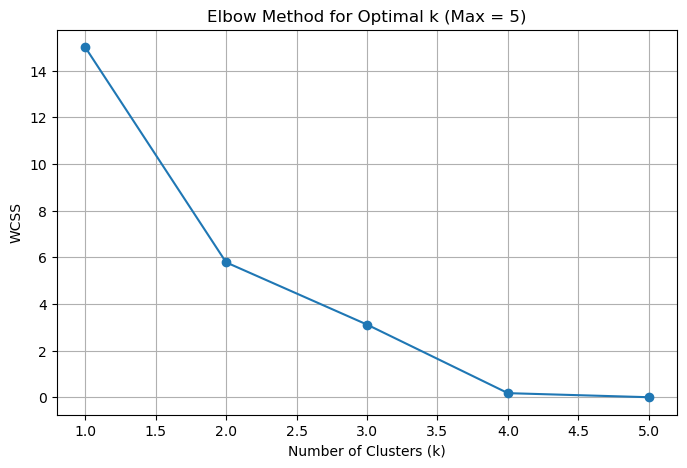

In [86]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal k (Max = 5)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [110]:
# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels
df['Segment'] = df['Cluster'].map({
    0: 'High Value Customer',
    1: 'Low Value Customer'
})
#  View the updated DataFrame
df

,Customer ID,Annual Spending,Purchase Frequency,Avg Order Value,Cluster,Segment
0,1,1200,12,100,1,Low Value Customer
1,2,3000,30,100,0,High Value Customer
2,3,450,5,90,1,Low Value Customer
3,4,800,8,100,1,Low Value Customer
4,5,2200,25,88,0,High Value Customer


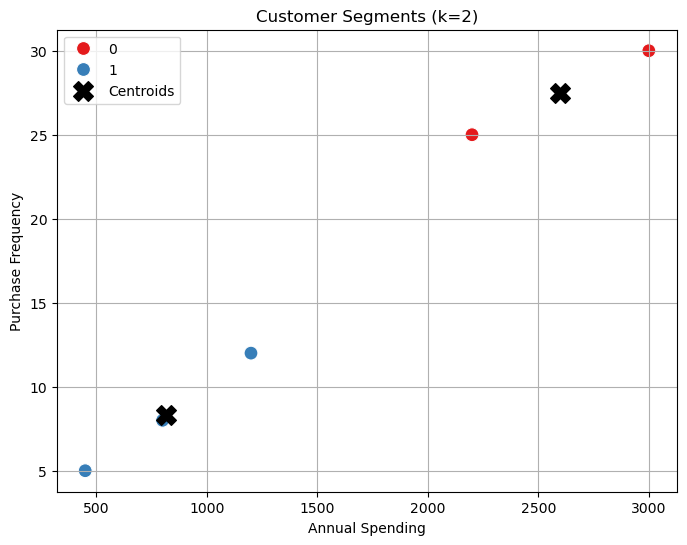

In [112]:
# Visualize clusters using two features
plt.figure(figsize=(8, 6))

# Plot each cluster separately
sns.scatterplot(
    x='Annual Spending',
    y='Purchase Frequency',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)

# Plot centroids (scale them back to original values for correct positioning)
centroids = kmeans.cluster_centers_
# Inverse transform to get original scale
centroids_original = scaler.inverse_transform(centroids)

plt.scatter(
    centroids_original[:, 0],  # AnnualSpending
    centroids_original[:, 1],  # PurchaseFrequency
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('Customer Segments (k=2)')
plt.xlabel('Annual Spending')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
# View the average profile of each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Customer ID  Annual Spending  Purchase Frequency  Avg Order Value
Cluster                                                                   
0           3.500000      2600.000000           27.500000        94.000000
1           2.666667       816.666667            8.333333        96.666667


## Interpretation:
#### Cluster 0 – High Value Customers
* High Annual Spending (2600)
* Frequent Purchases (27/year)
* Solid Avg Order Value (95)
* These are your loyal, high-spending customers.
* Target them with loyalty programs, upselling, exclusive offers.

## Cluster 1 – Low Value Customers
* Lower Annual Spending (816)
* Fewer Purchases (8/year)
* Avg Order Value similar

## Recomendation 
* These are your infrequent or casual buyers.
* Try to re-engage them with reminders, promotions, or bundling